# Assignment 12: Supervised Machine Learning Practice
Use this notebook to follow along with the tasks in the `AO8-Data_Wrangling.ipynb` notebook.

## Instructions
For each task, use the cell below to write and test your code.  You may add additional cells for any task as needed or desired.  

## Task 1a: Setup

Import the following package sets:
+ packages for data management
+ pacakges for visualization
+ packages for machine learning

Remember to activate the `%matplotlib inline` magic.

In [1]:
# Data Management
import numpy as np
import pandas as pd

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Machine learning: all modules coming from the sklearn 
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

%matplotlib inline

## Task 2a: Data Exploration

After reviewing the data in sections 2.1, 2.2, 2.3 and 2.4 do you see any problems with this iris dataset? If so, please describe them in the practice notebook.  If not, simply indicate that there are no issues.

In [5]:
iris = sns.load_dataset('iris')
iris.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


In [ ]:
# Qn: Considering column 1 through 4, can we predict which of the 3 classes (species) of flowers it belongs to?

## Task 2b:  Make Assumptions

After reviewing the data in sections 2.1, 2.2, 2.3 and 2.4 are there any columns that would make poor predictors of species? 

**Hint**: columns that are poor predictors are those with too many missing values, those with no difference in variation when grouped by the outcome class, variables with high levels of collinearity.

In [ ]:
# collinearity between petal length and petal width, but not for all species
# low variability of sepal width over petal length

In [ ]:
# sepal length and sepaal width seem bimodal, might require transformation

## Task 3a: Practice with the random forest classifier

Now that you have learned how to perform supervised machine learning using a variety of algorithms, lets practice using a new algorithm we haven't looked at yet: the Random Forest Classifier.  The random forest classifier builds multiple decision trees and merges them together.  Review the sklearn [online documentation for the RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html).  For this task:

1. Perform a 10-fold cross-validation strategy to see how well the random forest classifier performs with the iris data
2. Use a boxplot to show the distribution of accuracy
3. Use the `fit` and `predict` functions to see how well it performs with the testing data.
4. Plot the confusion matrix
5. Print the classification report.


In [8]:
# Separate the columns into dependent and independent variables (or features and labels)

In [ ]:
X = iris.loc[:,'sepal_length':'petal_width'].values # a NumPY array taking all the rows and the columns sepal_length and petal_width
X

In [ ]:
Y = iris['species'].values
Y

# Can also use:

In [16]:
x=iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]  # aka Features
y=iris['species']  # aka Label


In [17]:
# Now split dataset into training set and test set
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.3) # 70% training and 30% test

In [19]:
len(x_train)

105

In [21]:
len(x_test)

45

In [ ]:
# Then train the model on the training set

In [ ]:
# Recall: Imported Random Forest Model
from sklearn.ensemble import RandomForestClassifier

In [26]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=10)
clf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [27]:
#Train the model using the training sets y_pred=clf.predict(X_test)
# Syntax: clf.fit(features_train, labels_train)

clf.fit(x_train, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [24]:
# perform predictions on the test set
y_pred=clf.predict(x_test)
y_pred

array(['setosa', 'setosa', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'setosa', 'virginica', 'setosa', 'virginica', 'versicolor',
       'virginica', 'setosa', 'versicolor', 'virginica', 'virginica',
       'virginica', 'versicolor', 'versicolor', 'versicolor', 'virginica',
       'setosa', 'virginica', 'versicolor', 'versicolor', 'virginica',
       'versicolor', 'setosa', 'virginica', 'setosa', 'setosa', 'setosa',
       'versicolor', 'setosa', 'setosa', 'setosa', 'setosa', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa', 'setosa',
       'versicolor', 'virginica'], dtype=object)

In [34]:
# compute accuracy using training data:
clf.score(x_train, y_train)

0.9904761904761905

In [56]:
# compute accuracy using test data: 
clf.score(x_test, y_test)

0.9555555555555556

In [35]:
# You can also make a prediction for a single item, for example: sepal length = 3, sepal width = 5, petal length = 4, petal width = 2
# Now you can predict which type of flower it is:
clf.predict([[3, 5, 4, 2]])

array(['versicolor'], dtype=object)

In [39]:
flower = [[5.2,0.9,0,0]]
class_code = clf.predict(flower)
class_code

array(['setosa'], dtype=object)

In [41]:
# Plot of the confusion matrix: predicted classes vs actual classes
# Recall: from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[19,  0,  0],
       [ 0, 10,  0],
       [ 0,  2, 14]], dtype=int64)

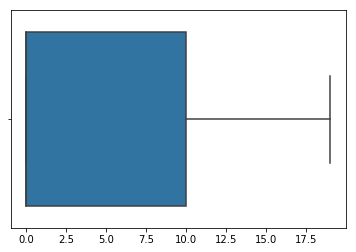

In [66]:
# Boxplot to show the distribution of accuracy (proportion of number of correct classifications per species)
sns.boxplot(cm_df)

In [46]:
# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = ['setosa','versicolor','virginica'], 
                     columns = ['setosa','versicolor','virginica'])
cm_df

,setosa,versicolor,virginica
setosa,19,0,0
versicolor,0,10,0
virginica,0,2,14


Text(0.5, 76.01999999999997, 'Predicted label')

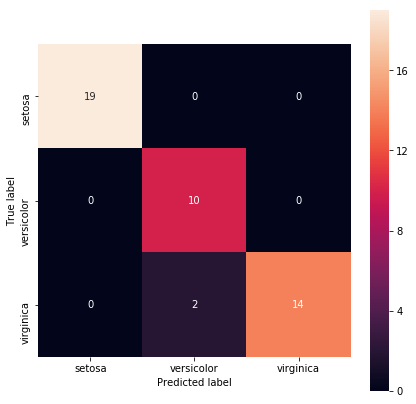

In [52]:
# Visual confusion matrix with seaborn visualiztion lib:
plt.figure(figsize=(7, 7))
sns.heatmap(cm_df, square=True, annot=True)
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [61]:
# Printing the classification report:
print(accuracy_score(y_test, y_pred))


0.9555555555555556


In [59]:
print(confusion_matrix(y_test, y_pred))


[[19  0  0]
 [ 0 10  0]
 [ 0  2 14]]


In [60]:

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.83      1.00      0.91        10
   virginica       1.00      0.88      0.93        16

   micro avg       0.96      0.96      0.96        45
   macro avg       0.94      0.96      0.95        45
weighted avg       0.96      0.96      0.96        45



In [67]:
sns.boxplot(x='model_name', y='accuracy') 

ValueError: Could not interpret input 'model_name'

In [69]:
sns.boxplot(x='clf', y='accuracy', data=cm_df)

ValueError: Could not interpret input 'clf'